In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

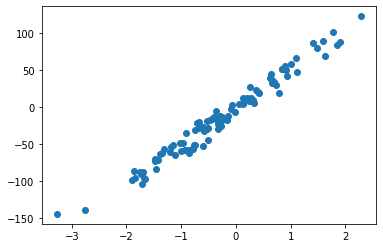

In [21]:
X_test, y_test = make_regression(n_features=1, noise=8)
plt.scatter(X_test,y_test)
plt.show()

In [22]:
# Selecting Data for Modeling
boston_houses_data = pd.read_csv('boston.csv')
boston_houses_data

# Input features in order:
# 1) CRIM: per capita crime rate by town
# 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3) INDUS: proportion of non-retail business acres per town
# 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
# 6) RM: average number of rooms per dwelling
# 7) AGE: proportion of owner-occupied units built prior to 1940
# 8) DIS: weighted distances to five Boston employment centres
# 9) RAD: index of accessibility to radial highways
# 10) TAX: full-value property-tax rate per $10,000 [$/10k]
# 11) PTRATIO: pupil-teacher ratio by town
# 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13) LSTAT: % lower status of the population

# Output variable:
# 1) MEDV: Median value of owner-occupied homes in $1000's [k$]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [23]:
# Selecting The Prediction Target
y = boston_houses_data['MEDV']

In [24]:
# Choosing features
boston_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [25]:
X = boston_houses_data[boston_features]

In [26]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [35]:
# Building the Model
boston_model_TreeRegression = DecisionTreeRegressor(random_state=1)
boston_model_LinearRegression =  LinearRegression()

boston_model_LinearRegression.fit(X, y)
boston_model_TreeRegression.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [36]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [46]:
print('Desicion Tree Regression: ', boston_model_TreeRegression.predict(X.head()))
print('Linear Regression: ', boston_model_LinearRegression.predict(X.head()))

Desicion Tree Regression:  [24.  21.6 34.7 33.4 36.2]
Linear Regression:  [30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


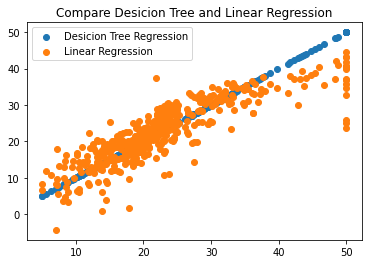

In [51]:
# Draw graph

origin_medv_TreeRegression = y
predicted_medv_TreeRegression = boston_model_TreeRegression.predict(X)

origin_medv_LinearRegression = y
predicted_medv_LinearRegression = boston_model_LinearRegression.predict(X)

plt.title('Compare Desicion Tree and Linear Regression')

plt.scatter(origin_medv_TreeRegression, predicted_medv_TreeRegression, label='Desicion Tree Regression')
plt.scatter(origin_medv_LinearRegression, predicted_medv_LinearRegression, label='Linear Regression')

plt.legend()